In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import RocCurveDisplay, roc_curve, auc, classification_report, confusion_matrix

In [39]:
df = pd.read_csv("C:\\Users\\piyaa\\OneDrive\\Desktop\\smoke_detection_iot.csv")

In [40]:
df

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [38]:
# Preliminary Data View

In [41]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [42]:
df.tail()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [73]:
df.shape

(62630, 13)

In [43]:
df = df.drop(columns=["Unnamed: 0", "CNT", "UTC"], axis=1)
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 6.2 MB


In [45]:
df.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'Fire Alarm'],
      dtype='object')

In [46]:
df.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [11]:
# Univivariate & Bivariate EDA

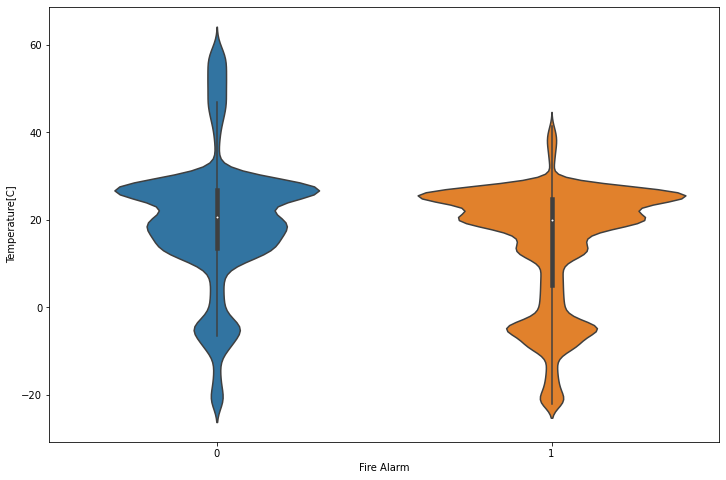

In [47]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="Fire Alarm", y="Temperature[C]", data=df)

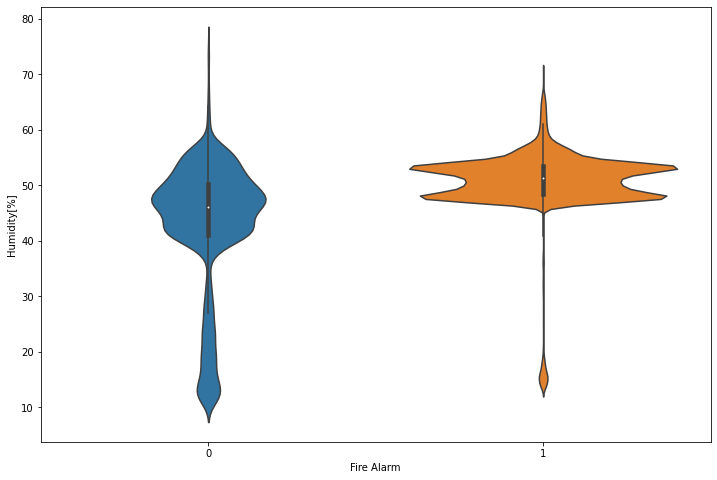

In [48]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="Fire Alarm", y="Humidity[%]", data=df)

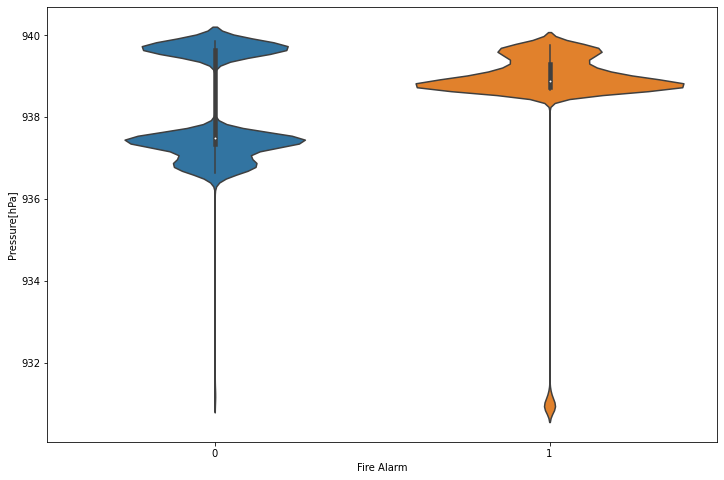

In [49]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="Fire Alarm", y="Pressure[hPa]", data=df)

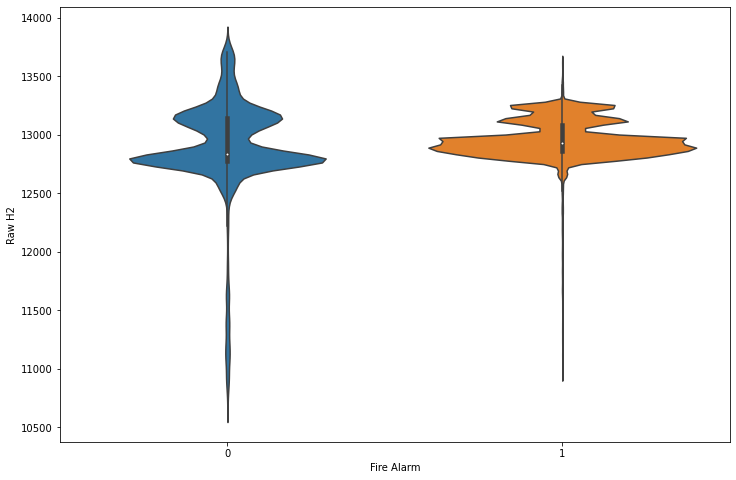

In [50]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="Fire Alarm", y="Raw H2", data=df)

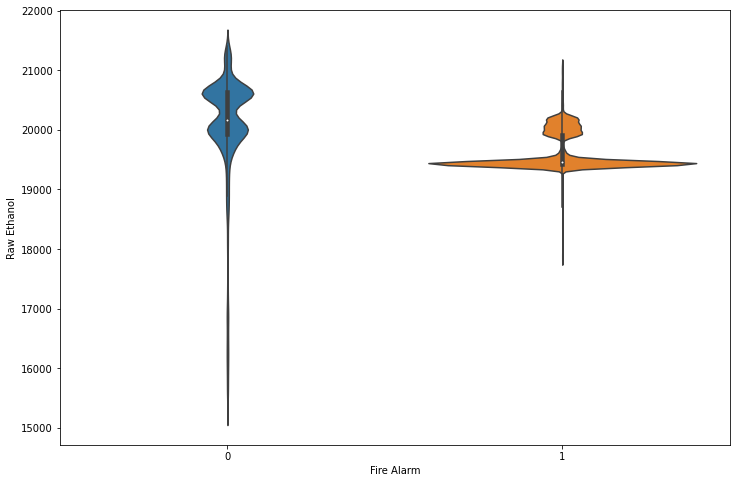

In [51]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="Fire Alarm", y="Raw Ethanol", data=df)

<Figure size 864x576 with 0 Axes>

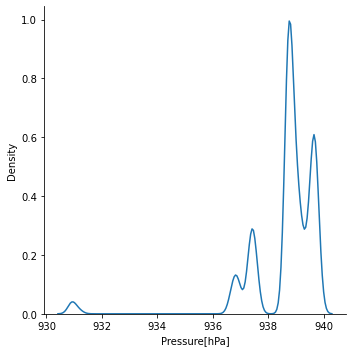

In [52]:
plt.figure(figsize=(12,8))
sns.displot(df, x="Pressure[hPa]", kind="kde")

<Figure size 864x576 with 0 Axes>

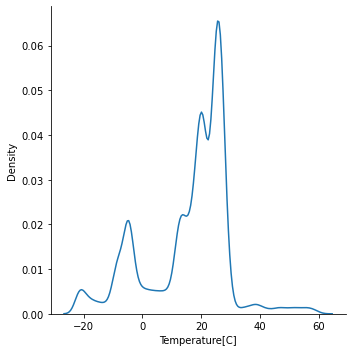

In [53]:
plt.figure(figsize=(12,8))
sns.displot(df, x="Temperature[C]", kind="kde")

<Figure size 864x576 with 0 Axes>

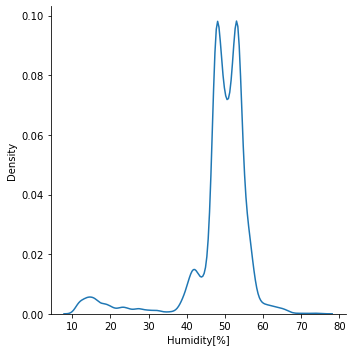

In [54]:
plt.figure(figsize=(12,8))
sns.displot(df, x="Humidity[%]", kind="kde")

<AxesSubplot:>

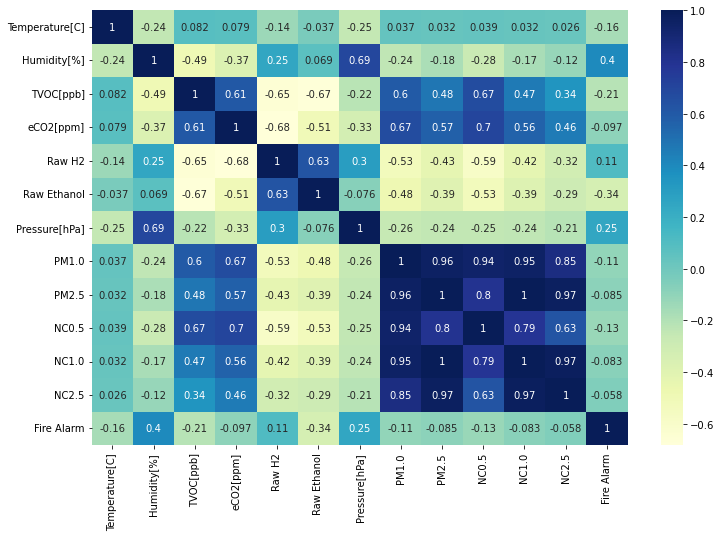

In [55]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [56]:
# Data Preparation & Model Creation

In [57]:
X_train=df.drop(columns="Fire Alarm")
y_train=df["Fire Alarm"]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [58]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (43841, 12)
Test dataset shape (43841,)


In [59]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)
print('*'*100)
categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5'],
      dtype='object')
****************************************************************************************************
Index([], dtype='object')


In [60]:
numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('*'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])


print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])


Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


In [61]:
def prepare_model(algorithm):
    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

In [62]:
def prepare_confusion_matrix(algo, model):
    print(algo)
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 

In [63]:
def prepare_classification_report(algo, model):
    print(algo+' Report :')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

In [64]:
def prepare_roc_curve(algo, model):
    print(algo)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

In [65]:
algorithms = [('logistic regression', LogisticRegression()), 
              ('KNN classifier', KNeighborsClassifier()), 
              ('Random Forest calssifier', RandomForestClassifier()), 
              ('Adaboost classifier', AdaBoostClassifier()), 
              ('Gradientboot classifier',GradientBoostingClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

In [66]:
# Model Evaluation

In [67]:
print(model_and_score)

{'logistic regression': '83.25311922629503%', 'KNN classifier': '97.89010287174106%', 'Random Forest calssifier': '100.0%', 'Adaboost classifier': '90.2739444811934%', 'Gradientboot classifier': '93.8391003854839%'}


logistic regression


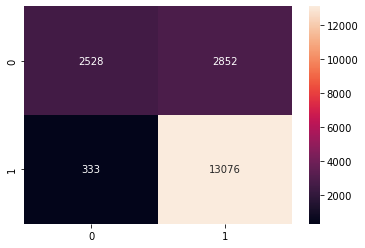

KNN classifier


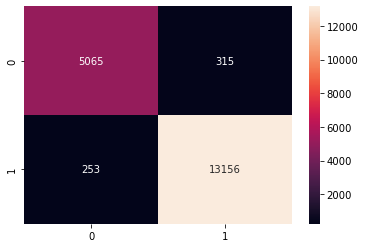

Random Forest calssifier


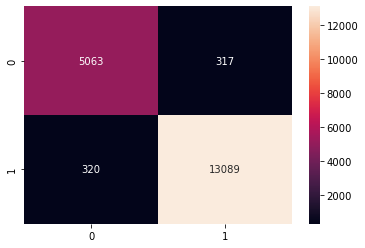

Adaboost classifier


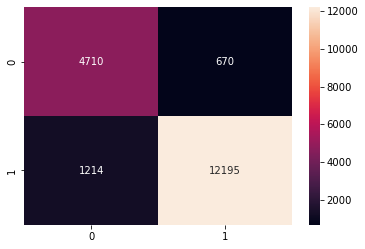

Gradientboot classifier


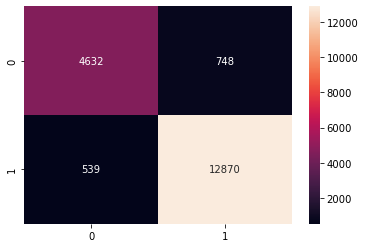

In [68]:
for index, tup in enumerate(trained_models):
    prepare_confusion_matrix(tup[0], tup[1])

In [69]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

logistic regression Report :
              precision    recall  f1-score   support

           0       0.88      0.47      0.61      5380
           1       0.82      0.98      0.89     13409

    accuracy                           0.83     18789
   macro avg       0.85      0.72      0.75     18789
weighted avg       0.84      0.83      0.81     18789



KNN classifier Report :
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5380
           1       0.98      0.98      0.98     13409

    accuracy                           0.97     18789
   macro avg       0.96      0.96      0.96     18789
weighted avg       0.97      0.97      0.97     18789



Random Forest calssifier Report :
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5380
           1       0.98      0.98      0.98     13409

    accuracy                           0.97     18789
   macro avg       0.96      0.96    

logistic regression


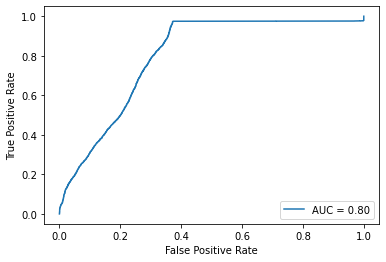

KNN classifier


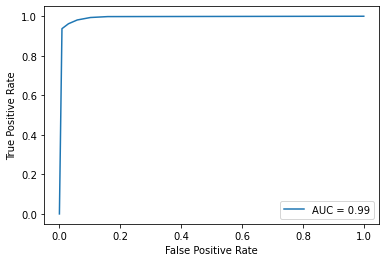

Random Forest calssifier


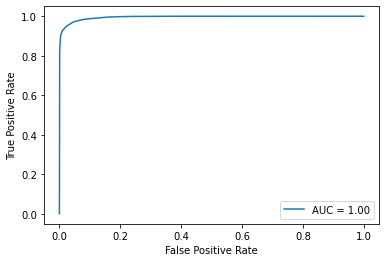

Adaboost classifier


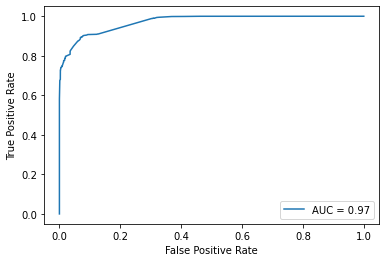

Gradientboot classifier


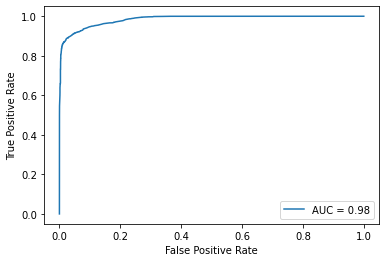

In [70]:
for index, tup in enumerate(trained_models):
    prepare_roc_curve(tup[0], tup[1])

In [71]:
# Summary
# - All Algorithms are performing good on the test data set with high precision & recall
# - out of the 5 different algorithms we considered 'KNN classifier', 'Random Forest calssifier' performed best with '97.92%', 
# '99.99%' accuracy respectively.